## Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_excel("fire_classify.xlsx")
df

,Smoke level,Fire Level,Fire Class
0,73,0,a
1,73,0,a
2,72,0,a
3,72,0,a
4,70,0,a
...,...,...,...
248,128,0,b
249,128,0,b
250,128,0,b
251,128,0,b


In [ ]:
# df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [10]:
df

,Smoke level,Fire Level,Fire Class
0,73,0,a
1,73,0,a
2,72,0,a
3,72,0,a
4,70,0,a
...,...,...,...
248,128,0,b
249,128,0,b
250,128,0,b
251,128,0,b


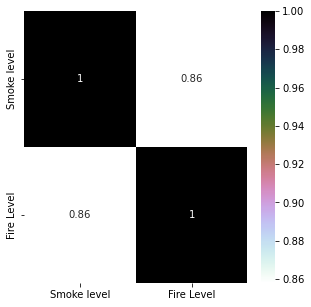

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap
plt.show()

## Data Visualization

In [12]:
df.columns

Index(['Smoke level', 'Fire Level', 'Fire Class'], dtype='object')

In [13]:
mag="magma"

<AxesSubplot:xlabel='Fire Class', ylabel='count'>

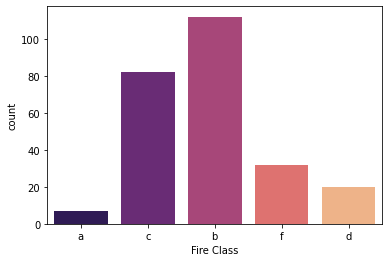

In [15]:
sns.countplot(x="Fire Class",data=df,palette=mag)

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [17]:
X = df.drop(columns='Fire Class', axis =1)
Y = df['Fire Class']

In [18]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(253, 2) (202, 2) (51, 2)


## Logistic Regression model

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, Y_train)

C:\Users\vedantkadam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  98.01980198019803


In [29]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  96.07843137254902


## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dis_tree = DecisionTreeClassifier()
dis_tree.fit(X_train, Y_train)
prediction_dis = dis_tree.predict(X_test)
print('The accuracy of Decision Tree is: ', test_data_accuracy)

The accuracy of Decision Tree is:  0.9607843137254902


In [27]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  96.07843137254902


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_dis))

              precision    recall  f1-score   support

           a       0.31      0.31      0.31        26
           b       0.22      0.24      0.23        33
           c       0.38      0.37      0.38        67
           d       0.31      0.33      0.32        58
           k       0.00      0.00      0.00        16

    accuracy                           0.30       200
   macro avg       0.24      0.25      0.25       200
weighted avg       0.29      0.30      0.30       200



# KNN Algorithm

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import metrics # for checking the model accuracy# KNN classifier

In [46]:
knn_m = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
knn_m.fit(X_train, Y_train)
prediction1 = knn_m.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

The accuracy of KNN is:  0.9803921568627451


In [36]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00         1
           b       1.00      1.00      1.00        23
           c       0.94      1.00      0.97        17
           d       1.00      0.75      0.86         4
           f       1.00      1.00      1.00         6

    accuracy                           0.98        51
   macro avg       0.99      0.95      0.97        51
weighted avg       0.98      0.98      0.98        51



In [48]:
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(X_test_prediction, Y_test))
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction_dis, Y_test))
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

The accuracy of the Logistic Regression is:  0.9607843137254902
The accuracy of Decision Tree is:  0.9607843137254902
The accuracy of KNN is:  0.9803921568627451
